# 리뷰 태그화 및 대표 태그 선정
전시/영화 별 리뷰를 모아 대표하는 태그를 선정한다<br>
블로그 형식의 전시 리뷰는 **(1) 요약 후 형용사 추출 -> 대표 형용사 선정**과 (2)방법을 같이 사용<br>
짧은 리뷰가 많은 영화의 경우는 **(2) 전체 리뷰를 대상으로 형용사 추출 및 빈도수(등 기준)에 따라 대표 형용사 선정**

### 전시

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import csv
from selenium import webdriver
from tqdm.notebook import tqdm

In [2]:
from konlpy.tag import Twitter
import TextrankPmi

In [3]:
url='https://cafe.naver.com/culturebloom?iframe_url=/ArticleRead.nhn%3Farticleid=940097%26clubid=27745269'
driver = webdriver.Chrome('./chromedriver')
driver.implicitly_wait(3)

driver.get(url)
driver.switch_to.frame('cafe_main')
page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')

text=soup.select('div.NHN_Writeform_Main span')
driver.close()

review=""
for i in range(len(text)):
    review += text[i].text+" "
review

'예술의 전당 한가람미술관에서 열리고 있는 이탈리아 디자인의 거장 카스틸리오니 전을 드디어 다녀왔습니다 .\xa0  이번 달  26 일까지이니 관심 있는 분 서두르세요 .  도슨트 해설도 놓치지 마시고요 .  전시장 구성은  SPACE 1~5 까지 다섯 섹션으로 구분되어 있는데 ,  구역마다 그의 작품의 특색이 명확하게 표현되어 있어 전시되어 있는 점이 좋았습니다 .     SPACE 1.  카스틸리오니의 세계  두꺼운 비닐에 프린트된 그의 작품명과 제작년도 ,  수상작품 ,  수상연도들이 프레임 모듈에 걸린 발같이 주렁주렁 걸려있습니다 .  옆으로 벌리거나 앞으로 당겨 읽을 수 있어 전시 관람객들의 적극적인 참여를 유도하고 있는 것 같았습니다 .  1  전시실에서도 그의 작품 몇 가지를 만날 수 있었는데요 ,  그 첫 번째는 루미나토르라는 긴 막대기와 삼각대 ,  그리고 그 끝에 천정을 향해 빛을 내는 조명 ,  그리고 거울인데요 ,  우선 조명은  1955 년 제작된 작품으로 황금 콤파스상을 수상한 작품입니다 .  작품이 올려져 있는 곳에 거울이 설치되어 있는데요 ,  그 조명 작품은 삼각형 단 위에 올려져 있고 양쪽 변으로 거울이 설치되어 있는데 ,  서로 면을 비추어 주니 관람객이 마주 서면 꼭 여섯변을 만나는 느낌 ,  이곳에서 뒤태로 사진을 찍으면 꼭  6 명이 손을 맞잡은 듯이 보입니다 .  멋지게 촬영해 보세요 .  SPACE 2.  카스틸리오니와 밀라노  그의 스튜디오 책상 위에는 평소 그가 자주 사용하던 물건들이 올려져 있어요 .  작업실은 거울을 통해 서재 ,  거실 등을 볼 수 있도록 해 놓았습니다 .  이게 보통 사람 같으면 정신없고 착시 때문에 평범한 일상을 보내기 어려웠을 것 같은데 ,  창작자의 시각은 달랐나 봅니다 .    가족들의 사진도 독특한 방법으로 전시가 되었는데요 ,  항상 거울이  45 도 각도로 걸려 있었다는 아버지의 독특했던 작업실을 모티브로 거울을 이용해 사진으로 가족사를 전시하고 있어요 .   동시대 활동한 작가

### 요약!

In [4]:
# 불용어 정의 -> 형태소 분석기가 잘못 분석하는 단어를 제거하기 위함입니다. 불용어의 정의가 잘될수록 성능이 올라갑니다.
stopword = set([('천이', 'Noun'),('입니', 'Adjective'),('있는', 'Adjective'),('어서', 'Noun'),('만큼', 'Noun')
                ,('면서', 'Noun'),('있게', 'Adjective'),('있습니다', 'Adjective'),('있는데', 'Adjective'),('없고', 'Adjective')
                ,('같은데', 'Adjective'),('있었는데요', 'Adjective'),('있어', 'Adjective'),('입니다', 'Adjective')])
sent=review

In [5]:
# 불필요한 문장 10% 뽑고 지우기
tr =  TextrankPmi.TextRank()
tagger = Twitter()
tr.loadSents(TextrankPmi.RawSentence(sent), 
             lambda sent: filter(lambda x: len(x[0])>=2 and x[1] in ('Noun', 'Verb', 'Adjective'), tagger.pos(sent)))
tr.build()
ranks = tr.rank()
delete_sent=[]
for k in sorted(ranks, key=ranks.get, reverse=True)[:100]:
    print("\t".join([str(k), str(ranks[k]), str(tr.dictCount[k])]))
    wow = str(tr.dictCount[k])
    delete_sent.append(wow)
cy = list(tr.dictCount.values())
delsent = delete_sent[-int(len(tr.dictCount) * 0.1):-1]
delsent.append(delete_sent[-1])
for i in range(0,len(delsent)):
    sent = sent.replace(delsent[i],'')

c:\users\youjeongsue\appdata\local\programs\python\python37\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


30	0.05303954894420601	  할 수 있는데 ,  그의  100 주년이던  2018 년 유럽에서 시작되어 세계 전시를 하고 있는 때문에 우리는  2020 년에 이 작품들을 보게 된 거예요 .
38	0.05179020833613878	      그림전시장보다 훨씬 더 생생한 감이 있는 곳이 디자인 전시장 같습니다 .
13	0.05128247629951667	   동시대 활동한 작가들의 작품도 일부 전시되어 있습니다 .
19	0.04251123001765623	  전시장 가에 있는 철골에는 그가 디자인한 작품들에 대한 설명과 실물을 ,  중앙에 있는 철골에는 붉은색 상자 안에 호기심이 많아 남의 집 서랍을 열어다 보는 듯한 느낌의 작품들이 전시되어 있어요 .
3	0.039387673568825436	  전시장 구성은  SPACE 1~5 까지 다섯 섹션으로 구분되어 있는데 ,  구역마다 그의 작품의 특색이 명확하게 표현되어 있어 전시되어 있는 점이 좋았습니다 .
0	0.03821818353286199	예술의 전당 한가람미술관에서 열리고 있는 이탈리아 디자인의 거장 카스틸리오니 전을 드디어 다녀왔습니다 .
22	0.03794562545912815	 그도 뒤샹과 같은 레디메이드 작품을 여럿 선보이고 있습니다 .
31	0.03742567135649523	 34 점의 작품을 사방의 거울을 통하여 보니 정말 나무가 빽빽한 숲속에 있는 느낌이 들죠 ?
27	0.03421513498038972	  포스터의 숲  이번 전시회가 특별한 두 가지 의미를 가지고 있는데 ,  하나는 아시아 최초의 카스틸리오니 단독전이라는 점이고 .
23	0.033752482551147586	  아이콘  이 전시실에서는 카스틸리오니 형제에게 국제적 명성을 안겨준 제품들이 전시되어 있습니다 .
34	0.032346722709293896	    세상은 그의 작품을 놓고  ' 평범함의 승리 " 라고 한다고 합니다 .
1	0.03173824892473695	   이번 달  26 일까지이니 관심 있

In [6]:
# 핵심어 뽑기 -> window, coef, 단어의 품사, 전체 단어 비율을 조절할 수 있다.
tr = TextrankPmi.TextRank(window=4, coef=1)
tr.load(TextrankPmi.RawTagger(sent),lambda w: w not in stopword and w[0].find('있')==-1 and len(w[0])>=2 and w[1] in ('Adjective'))
tr.build()
kw = tr.extract(0.4)
for k in sorted(kw, key=kw.get, reverse=True):
    print("%s\t%g" % (k, kw[k]))

(('좋았습니다', 'Adjective'),)	0.193432
(('두꺼운', 'Adjective'),)	0.193432
(('같았습니다', 'Adjective'),)	0.193432
(('같으면', 'Adjective'),)	0.193432
(('어려웠을', 'Adjective'),)	0.193432


### 형용사 추출 및 클러스터링

In [7]:
import numpy as np
import konlpy

In [8]:
def remove_value(in_list):
    val = ['있다','이다','같다','없다','아니다']
    return [word for word in in_list if word not in val]

In [17]:
okt=konlpy.tag.Okt()
clean_words=[]
for word in okt.pos(review,stem=True):
    if word[1] in ['Adjective']:
        clean_words.append(word[0])
clean_words = remove_value(clean_words)
clean_words

['명확하다',
 '좋다',
 '두껍다',
 '멋지다',
 '평범하다',
 '어렵다',
 '다르다',
 '독특하다',
 '독특하다',
 '유명하다',
 '유명하다',
 '다르다',
 '이렇다',
 '궁금하다',
 '좋다',
 '붉다',
 '많다',
 '새롭다',
 '소소하다',
 '어떻다',
 '야하다',
 '선하다',
 '특별하다',
 '빽빽하다',
 '평범하다',
 '자세하다',
 '평범하다',
 '생생하다',
 '평범하다',
 '자세하다']

In [10]:
eng_clean_words=list(set([
'clear',
 'good',
 'thick',
 'cool',
 'normal',
 'difficult',
 'different',
 'special',
 'special',
 'famous',
 'famous',
 'different',
 'yes',
 'wonder',
 'good',
 'red',
 'many',
 'new',
 'small',
 'how',
 'special',
 'dense',
 'normal',
 'more on',
 'normal',
 'live',
 'normal',
 'detailed']))
eng_clean_words

['famous',
 'detailed',
 'different',
 'cool',
 'yes',
 'red',
 'good',
 'wonder',
 'difficult',
 'dense',
 'small',
 'new',
 'how',
 'thick',
 'clear',
 'live',
 'more on',
 'many',
 'special',
 'normal']

In [20]:
from gensim import models
ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')

MemoryError: cannot allocate array memory

In [11]:
from gensim import models
en_model = models.fasttext.load_facebook_model('cc.en.300.bin.gz')

unable to import 'smart_open.gcs', disabling that module


In [12]:
from sklearn.decomposition import PCA
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

In [18]:
pca=PCA(n_components=3)
xys=pca.fit_transform([ko_model.wv.word_vec(w) for w in clean_words])

xs=xys[:,0]
ys=xys[:,1]
plt.figure(figsize=(14,10))
plt.scatter(xs, ys, marker='o')
for i,v in enumerate(clean_words):
    plt.annotate(v, xy=[xs[i],ys[i]])

NameError: name 'ko_model' is not defined

c:\users\youjeongsue\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\youjeongsue\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


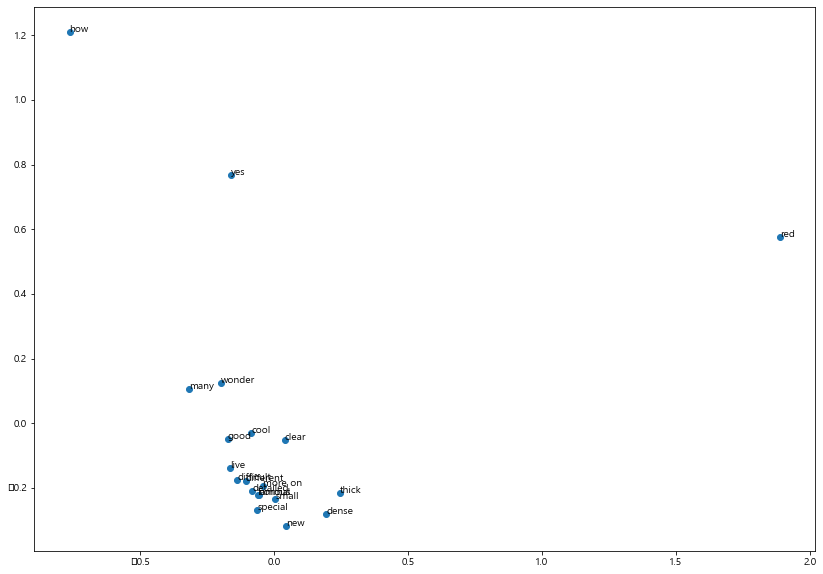

In [19]:
pca=PCA(n_components=3)
xys=pca.fit_transform([en_model.wv.word_vec(w) for w in eng_clean_words])

xs=xys[:,0]
ys=xys[:,1]
plt.figure(figsize=(14,10))
plt.scatter(xs, ys, marker='o')
for i,v in enumerate(eng_clean_words):
    plt.annotate(v, xy=[xs[i],ys[i]])

### 리뷰 태그화

In [15]:
import pandas as pd
watcha_review=pd.read_csv('watcha_review.csv')

In [16]:
temp_review = watcha_review.loc[watcha_review['movie_id']==5,:]
temp_review

,Unnamed: 0,Unnamed: 0.1,movie_id,user,rate,likes,review
228,228,228.0,5,pberry_movie,4.0,676.0,"손끝에서 나온 줄 알았던 글은, 마음에서 지운 조각들"
229,229,229.0,5,남윤주,5.0,597.0,개인적으로 제임스 맥어보이는 신의 한수라고 생각..
230,230,230.0,5,ggabunee,4.0,585.0,맥어보이 시대극 한번만 더 찍어줬으면좋겠다\n맥어보이는 이런 영화 의무적으로 많이 ...
231,231,231.0,5,나단비,4.0,0.0,시발 용기를 좀만 더 내서 사랑을 이뤄요 나중에 다른년이랑 낳은 딸 이름을 사랑했...
232,232,232.0,5,유주,5.0,274.0,무도회장에서 갑자기 나타난 맥어보이와 춤추다가 마주치는 장면은 생각만 해도 설렌다....
233,233,233.0,5,GJHS,3.5,249.0,"사랑한다는 것은 서로를 자신의 삶 안에 영원히 가두어버리는 것. ""제인.""이라는 짧..."
234,234,234.0,5,임지혜,5.0,0.0,딸의 이름을 제인이라고 지은 톰. 그리고 평생 독신으로 산 제인. 어땠을까. 그 마음이
235,235,235.0,5,이혜인,4.5,135.0,여성 소설가로는 역사에 길이남을 삶을 살았다지만 한 여성으로는 너무 가혹한 현실이 ...
236,236,236.0,5,SoSo,3.5,129.0,예나 지금이나 자아를 찾는 여자는 혼자 살게 되는 듯.
237,237,237.0,5,GodsGRACE,5.0,108.0,"""please, Jane""\n제임스맥어보이의 이 한마디로 모든 것이 표현된다"


In [ ]:
temp_review.iloc[0].review

In [ ]:
# 핵심어 뽑기 -> window, coef, 단어의 품사, 전체 단어 비율을 조절할 수 있다.
tr = TextrankPmi.TextRank(window=4, coef=1)
tr.load(TextrankPmi.RawTagger(temp_review.iloc[0].review),lambda w: w not in stopword and len(w[0])>=2 and w[1] in ('Adjective'))
tr.build()
kw = tr.extract(0.3)
for k in sorted(kw, key=kw.get, reverse=True):
    print("%s\t%g" % (k, kw[k]))

영어로 해보는거
형용사 추출 정교하게
clustering
리뷰별 추출/장소별 추출